# Chapter 3 Applied Labs

## Q8

### (a) Perform a  linear regression on the `Auto` dataset with `mpg` as the response and `horsepower` as the predictor - use `summary()` to print the results. Comment on the output.


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set(style="whitegrid")

In [4]:
auto = sm.datasets.get_rdataset("Auto", "ISLR").data
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# statsmodels doesn't assume there'll be an intercept, so you have to add one!
X_train =  sm.add_constant(auto)

# Use the R syntax to perform the regression
model = smf.ols('mpg~horsepower', data=auto)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 15 May 2019   Prob (F-statistic):           7.03e-81
Time:                        21:25:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

/home/wpg/.local/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Comment on the results:
- Is there a relationship between predictor and response?
    - Yes, the F-statistic has a p-value of << 0.001, meaning we can reject the null hypothesis that there is no relationship.
- How strong is the relationship?
    - "How strong" is difficult, but "how strongly linear" is easier: the linear fit explains 61% of the variance in our data. 
- Is the relationship positive or negative?
    - B1 < 0, so the relationship is negative
- What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?


In [26]:
# To answer the latter point:
predicted_mpg = results.get_prediction(pd.DataFrame(data=[98], columns=["horsepower"]))
predicted_mpg.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


The predicted mpg is ~24.5, the confidence interval is [24.0, 25.0] and the prediction interval is [14.8, 34.1]

### (b) Plot the response and the predictor.

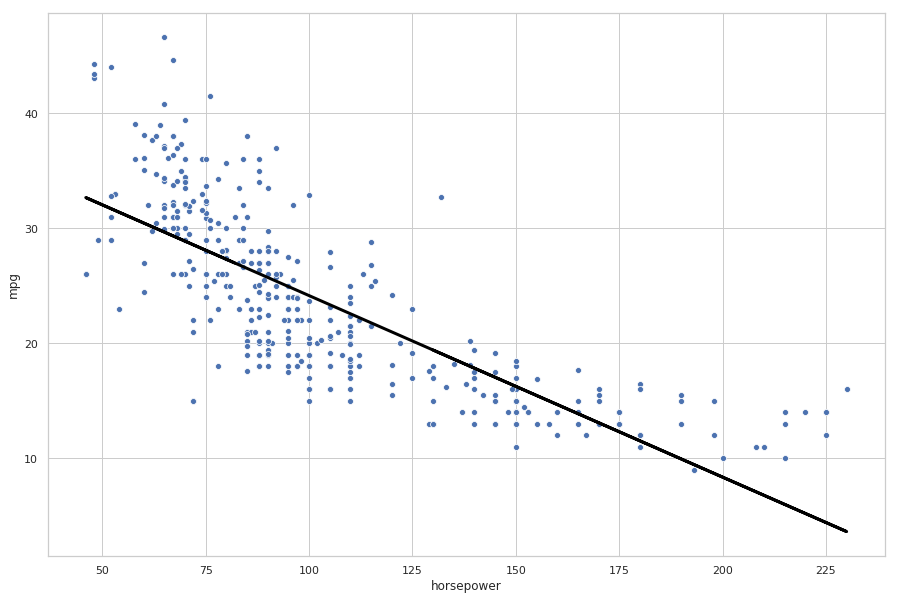

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot("horsepower", "mpg", data=auto, ax=ax)
# plot the fitted values
b0, b1 = results.params
plt.plot(auto.horsepower, b0+b1*auto.horsepower, lw=3, c="black")

### (c) Use the `plot()` function to produce diagnostic plots of the regression. Comment on any issues

We don't have this functionality, but we can plot residual vs horsepower and leverage vs residual plots manually.

Text(0, 0.5, 'residuals')

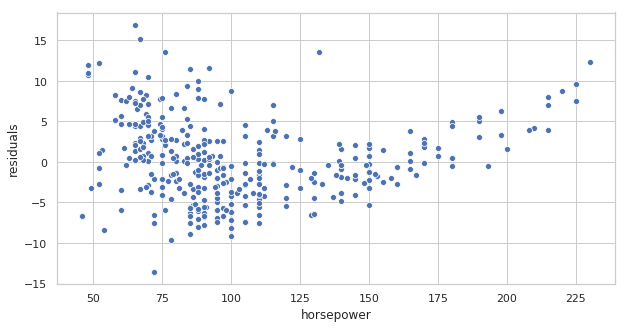

In [45]:
fig = plt.figure(figsize=(10,5))
# fig = sm.graphics.plot_regress_exog(results, "horsepower", fig=fig)
g = sns.scatterplot(auto.horsepower, results.resid)
g.set_ylabel("residuals")

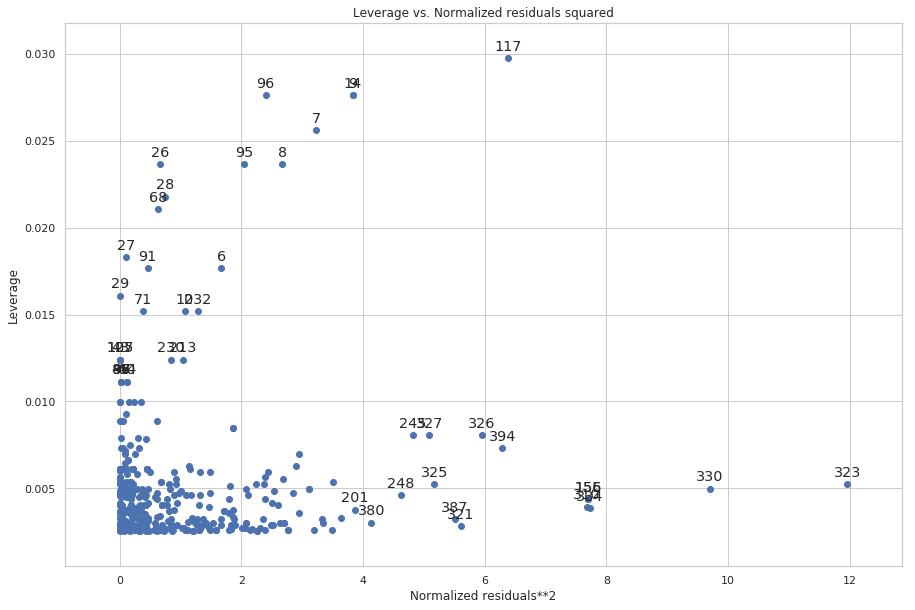

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)

From the residuals we can see clear evidence of non-linearity in the data. From the leverage vs residuals, we can see the high-leverage, high-error point 117. We might consider removing this point as an outlier